# Hyperparameter Optimization

## 1. Introduction

### 1.1 Setup

```bash
pip install hyperopt
```

In [1]:
import hyperopt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from hyperopt import fmin, hp, rand, tpe
from hyperopt.pyll.stochastic import sample
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### 1.2 Generate Data

In [2]:
X_MINIMUM, X_MAXIMUM = -np.pi, np.pi
Y_MINIMUM, Y_MAXIMUM = -np.pi, np.pi

search_space = {
    'x': hyperopt.hp.uniform('x', X_MINIMUM, X_MAXIMUM),
    'y': hyperopt.hp.uniform('y', Y_MINIMUM, Y_MAXIMUM)
}

def my_fn(params):
    x = params['x']
    y = params['y']
    return 0.1*(x**2 + y**2) + np.cos(x) * np.sin(0.4*y)

def generate_data(my_fn, n=100):
    x = np.linspace(X_MINIMUM, X_MAXIMUM, n)
    y = np.linspace(Y_MINIMUM, Y_MAXIMUM, n)
    X, Y = np.meshgrid(x, y)
    Z = my_fn({'x': X, 'y': Y})
    return X, Y, Z

## 2. Optimization

### 2.1 Define optimization subroutine

In [3]:
def optimize(my_fn, search_space, algo=hyperopt.tpe.suggest, max_evals=100, seed=12345):
    trials = hyperopt.Trials()
    result = hyperopt.fmin(
        fn=my_fn,
        space=search_space,
        algo=algo,
        trials=trials,
        max_evals=max_evals,
        rstate=np.random.RandomState(seed=seed)
    )
    return {
        'result': result,
        'trials': trials
    }

def result2df(r):
    # losses = pd.DataFrame(r['trials'].losses(), columns=['loss'])
    losses = pd.DataFrame(r['trials'].results)
    xy = pd.DataFrame(r['trials'].idxs_vals[1])
    return pd.concat((xy, losses), axis=1)

### 2.2 Optimize

In [4]:
X, Y, Z = generate_data(my_fn)
r = optimize(my_fn, search_space)
df = result2df(r)
result = r['result']
print(f"\nFinal result: {result}")

100%|██████████| 100/100 [00:00<00:00, 315.11trial/s, best loss: -0.3371924898290635]

Final result: {'x': 0.08749045960872692, 'y': -1.6788862343116628}


In [5]:
df.head()

,x,y,loss,status
0,0.685110,1.658327,0.798744,ok
1,3.071941,-0.578562,1.205964,ok
2,-1.140356,0.088286,0.145553,ok
3,1.524701,-2.851808,1.003870,ok
4,2.046869,-1.583734,0.941081,ok


In [6]:
idx = df['loss'].idxmin()
optimum = df.loc[idx, :]

### 2.3 Plot Data

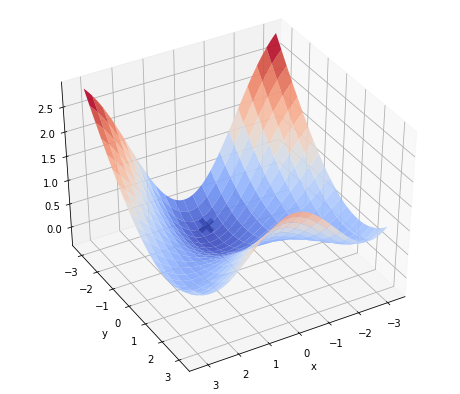

In [7]:
def plot_data(X, Y, Z, opt):
    fig = plt.figure(figsize=(8,7))
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(
        X, Y, Z, rstride=5, cstride=5, cmap=matplotlib.cm.coolwarm,
        linewidth=0.3, antialiased=True, alpha=0.9)
    
    ax.plot([opt['x']], [opt['y']], 'x',
            markerfacecolor='black', markeredgecolor='black',
            markersize=12, markeredgewidth=5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.view_init(elev=40, azim=60)
    
plot_data(X, Y, Z, optimum)

### 2.4 Show Sampling

Actual sampling during hyperparameter optimization

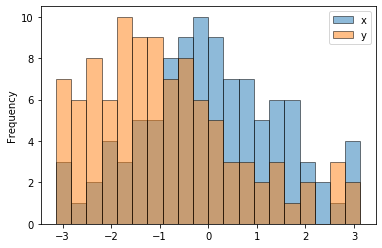

In [8]:
df[['x', 'y']].plot.hist(bins=20, edgecolor='black', alpha=0.5, stacked=False);

Default sampling

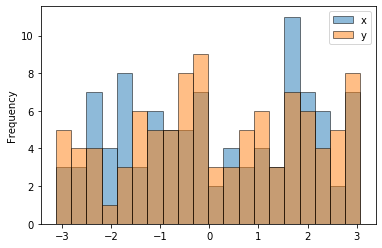

In [9]:
samples = pd.DataFrame(
    [ sample(search_space) for i in range(100) ]
)
samples.plot.hist(bins=20, edgecolor='black', alpha=0.5, stacked=False);